Hi there!

Thank you for taking the time to look over my python scraper. To begin, the text file that is scraped is called fetch_challenge.txt in the project repo.

In [1]:
import re
import string
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# downloaded the given Frankenstein exercept as a txt file in UTF-8 encoding
lines = []
with open('fetch_challenge.txt') as f:
    content = f.read()

In [3]:
# lowercase all words
content_low = content.lower()
# separate words connected through hyphens
content_sub = re.sub('—', ' ', content_low)
# split content into single words
content_split = content_sub.split()

There are 4 sentences in this text, composed of words that are “hidden”
(bookended by special characters). Find the sentences in the text.

In [4]:
# pattern is any characters between matching non alpha numeric characters
pattern = r'(\W)(.*)\1'

# find hidden words and add to list
hidden_words = []
for index, word in enumerate(content_split):
    match = re.search(pattern, word)
    if match != None:
        found_word = match.string 
        hidden_words.append(found_word)
        # transform hidden word into '' in case it is connected to a valid word
        content_split[index] = found_word.replace(match.group(),'')

Remove the 4 hidden sentences from the original text file and save a clean
version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')

In [5]:
# strip punctuation of chapter after finding hidden words
for i in range(len(content_split)):
    content_split[i] = content_split[i].translate(str.maketrans('', '', string.punctuation))

# drop elements that are only '' from transformed hidden words or punctuation
filter_object = filter(lambda x: x != "", content_split)
content_clean = list(filter_object)

# join word elements into clean txt
delimiter = ' '
clean_txt = delimiter.join(content_clean)

with open('Clean_Frankenstein.txt', 'w') as output:
    output.write(clean_txt)

Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop

In [6]:
# find the first special character in each word 
characters = [hidden_words[i][0] for i in range(len(hidden_words))]

# find the unique characters
uni_char = list(set(characters))

# create list of lists for the 4 hidden sentences
sentences = [[] for i in range(len(uni_char))]

# place words into correct sentences/list by checking their first special character
for j in range(len(uni_char)):
    for i in range(len(hidden_words)):
        if hidden_words[i][0] == uni_char[j]:
            sentences[j].append(hidden_words[i])
            
# strip punctuation from hidden sentences
for i in range(len(sentences)):
    sentences[i] = [sentences[i][j].translate(str.maketrans('', '', string.punctuation)) 
                    for j in range(len(sentences[i]))]
    
# join sentences
delimiter = ' '
all_sentences = [delimiter.join(sentences[i]) for i in range(len(sentences))]

# print with for loop
for sentence in all_sentences:
    print(sentence)

you are amazing
found another one
waltonwin
scrapers for the
youre killin it


Store all distinct words in the text in a dictionary and keep track of the word
counts (make sure to strip all punctuation and lower the case of the words)

In [7]:
distinct = dict()
for word in content_clean:
    if word not in distinct:
        distinct[word] = 1
    else:
        distinct[word] += 1

Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json')

In [8]:
with open('word_count_dict.json', 'w') as fp:
    json.dump(distinct, fp, sort_keys=True, indent=4)

Plot a histogram of the count of words by word length for all words in the
document

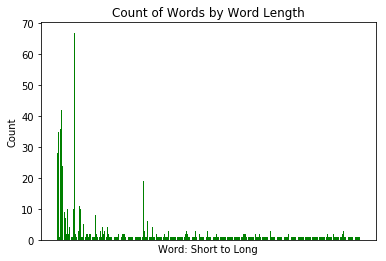

In [9]:
# sort the dictionary of distinct words and their count by the word's length
distinct_sorted = sorted(distinct.items(), key = lambda x: len(x[0]))

# put sorted word tuples into dataframe to plot
data = pd.DataFrame(distinct_sorted, columns = ["word","count"])

# plot
plt.bar(data['word'],data['count'], color='g')
plt.tick_params(
    axis='x',         
    which='both',     
    bottom=False,     
    top=False,        
    labelbottom=False)
plt.xlabel('Word: Short to Long')
plt.ylabel('Count')
plt.title('Count of Words by Word Length')
plt.show()